# T-Series YouTube Channel Analysis

T-Series is the most popular YouTube channel with staggering statistics. This notebook performs an advanced analysis of two datasets:

all_stats_t_series.csv - contains statistics of all videos on T-Series channel.
top_1000_details.csv - contains details of the top 1000 videos by view count.
This analysis includes data cleaning, exploratory data analysis (EDA), visualization, sentiment analysis, and time series analysis.

In [2]:
import pandas as pd

all_stats_df = pd.read_csv(r"C:\Users\parth\Desktop\Python_Project\all_stats_t_series.csv")
top_1000_details_df = pd.read_csv(r"C:\Users\parth\Desktop\Python_Project\top_1000_details.csv")

all_stats_df.head(), top_1000_details_df.head()

(            id  viewCount  likeCount  favoriteCount  commentCount
 0  c_VrTcIY8kA     233296    82028.0              0       13239.0
 1  GHyHfi7fnGQ      81592     4432.0              0         535.0
 2  SIN9YUhH6cU      31523     1436.0              0         209.0
 3  tPRge7PMVeM      45149      997.0              0         127.0
 4  UlrZOaT8ays      26186     2108.0              0          42.0,
             id   viewCount   likeCount  favoriteCount  commentCount  \
 0  BBAyRBTfsOU  1589926035  13163890.0              0        359141   
 1  sCbbMZ-q4-I  1394834659  11013187.0              0        341677   
 2  JFcgOboQZ08  1306259000   5587227.0              0        188513   
 3  vu5-aKf_QqA  1235684404   3569186.0              0         84749   
 4  f6vY6tYvKGA  1222902136   4065996.0              0         94157   
 
                                                title  \
 0  Vaaste Song: Dhvani Bhanushali, Tanishk Bagchi...   
 1  Lut Gaye (Full Song) Emraan Hashmi, Yukti | J

# Data Cleaning and Preprocessing

In [20]:
all_stats_df.fillna(0, inplace=True)
top_1000_details_df.fillna('', inplace=True)

top_1000_details_df['published_at'] = pd.to_datetime(top_1000_details_df['published_at'])
top_1000_details_df['likeCount'] = pd.to_numeric(top_1000_details_df['likeCount'], errors='coerce')

all_stats_df.describe(), top_1000_details_df.describe()

(          viewCount     likeCount  favoriteCount   commentCount
 count  1.985800e+04  1.985800e+04        19858.0   19858.000000
 mean   1.260461e+07  9.275963e+04            0.0    2703.479807
 std    5.785160e+07  3.779600e+05            0.0   12516.655943
 min    0.000000e+00  0.000000e+00            0.0       0.000000
 25%    8.419475e+04  8.012500e+02            0.0      44.000000
 50%    3.761185e+05  4.419000e+03            0.0     202.000000
 75%    2.760865e+06  2.788475e+04            0.0     993.000000
 max    1.589926e+09  1.316389e+07            0.0  419265.000000,
           viewCount     likeCount  favoriteCount   commentCount
 count  1.000000e+03  9.980000e+02         1000.0    1000.000000
 mean   1.851447e+08  1.213911e+06            0.0   33158.425000
 std    1.838688e+08  1.169341e+06            0.0   42845.833439
 min    5.679090e+07  1.070120e+05            0.0       0.000000
 25%    8.054338e+07  5.069760e+05            0.0   10606.000000
 50%    1.209838e+08  8.

# Exploratory Data Analysis (EDA)

In [21]:
all_stats_summary = all_stats_df.describe()
top_1000_details_summary = top_1000_details_df.describe()

all_stats_summary, top_1000_details_summary

(          viewCount     likeCount  favoriteCount   commentCount
 count  1.985800e+04  1.985800e+04        19858.0   19858.000000
 mean   1.260461e+07  9.275963e+04            0.0    2703.479807
 std    5.785160e+07  3.779600e+05            0.0   12516.655943
 min    0.000000e+00  0.000000e+00            0.0       0.000000
 25%    8.419475e+04  8.012500e+02            0.0      44.000000
 50%    3.761185e+05  4.419000e+03            0.0     202.000000
 75%    2.760865e+06  2.788475e+04            0.0     993.000000
 max    1.589926e+09  1.316389e+07            0.0  419265.000000,
           viewCount     likeCount  favoriteCount   commentCount
 count  1.000000e+03  9.980000e+02         1000.0    1000.000000
 mean   1.851447e+08  1.213911e+06            0.0   33158.425000
 std    1.838688e+08  1.169341e+06            0.0   42845.833439
 min    5.679090e+07  1.070120e+05            0.0       0.000000
 25%    8.054338e+07  5.069760e+05            0.0   10606.000000
 50%    1.209838e+08  8.

# Distribution of Views, Likes, and Comments¶

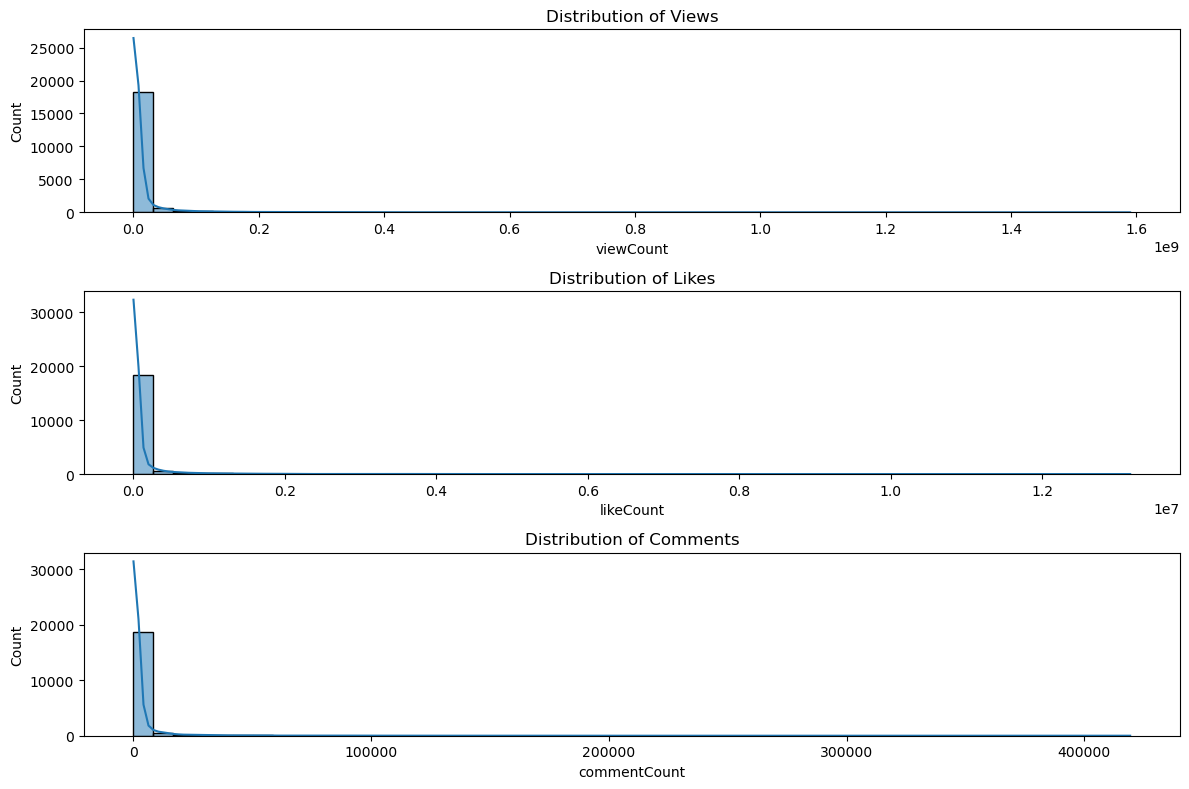

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
sns.histplot(all_stats_df['viewCount'], bins=50, kde=True)
plt.title('Distribution of Views')

plt.subplot(3, 1, 2)
sns.histplot(all_stats_df['likeCount'], bins=50, kde=True)
plt.title('Distribution of Likes')

plt.subplot(3, 1, 3)
sns.histplot(all_stats_df['commentCount'], bins=50, kde=True)
plt.title('Distribution of Comments')
plt.tight_layout()
plt.show()

# Correlation Analysis

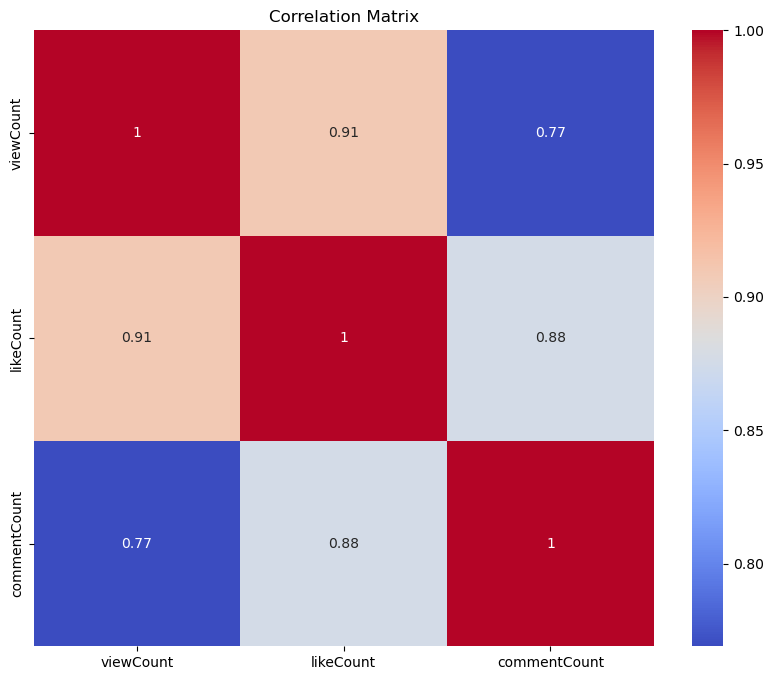

In [23]:
corr_matrix = all_stats_df[['viewCount', 'likeCount', 'commentCount']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Visualization¶
Top Videos by Views, Likes, and Comments

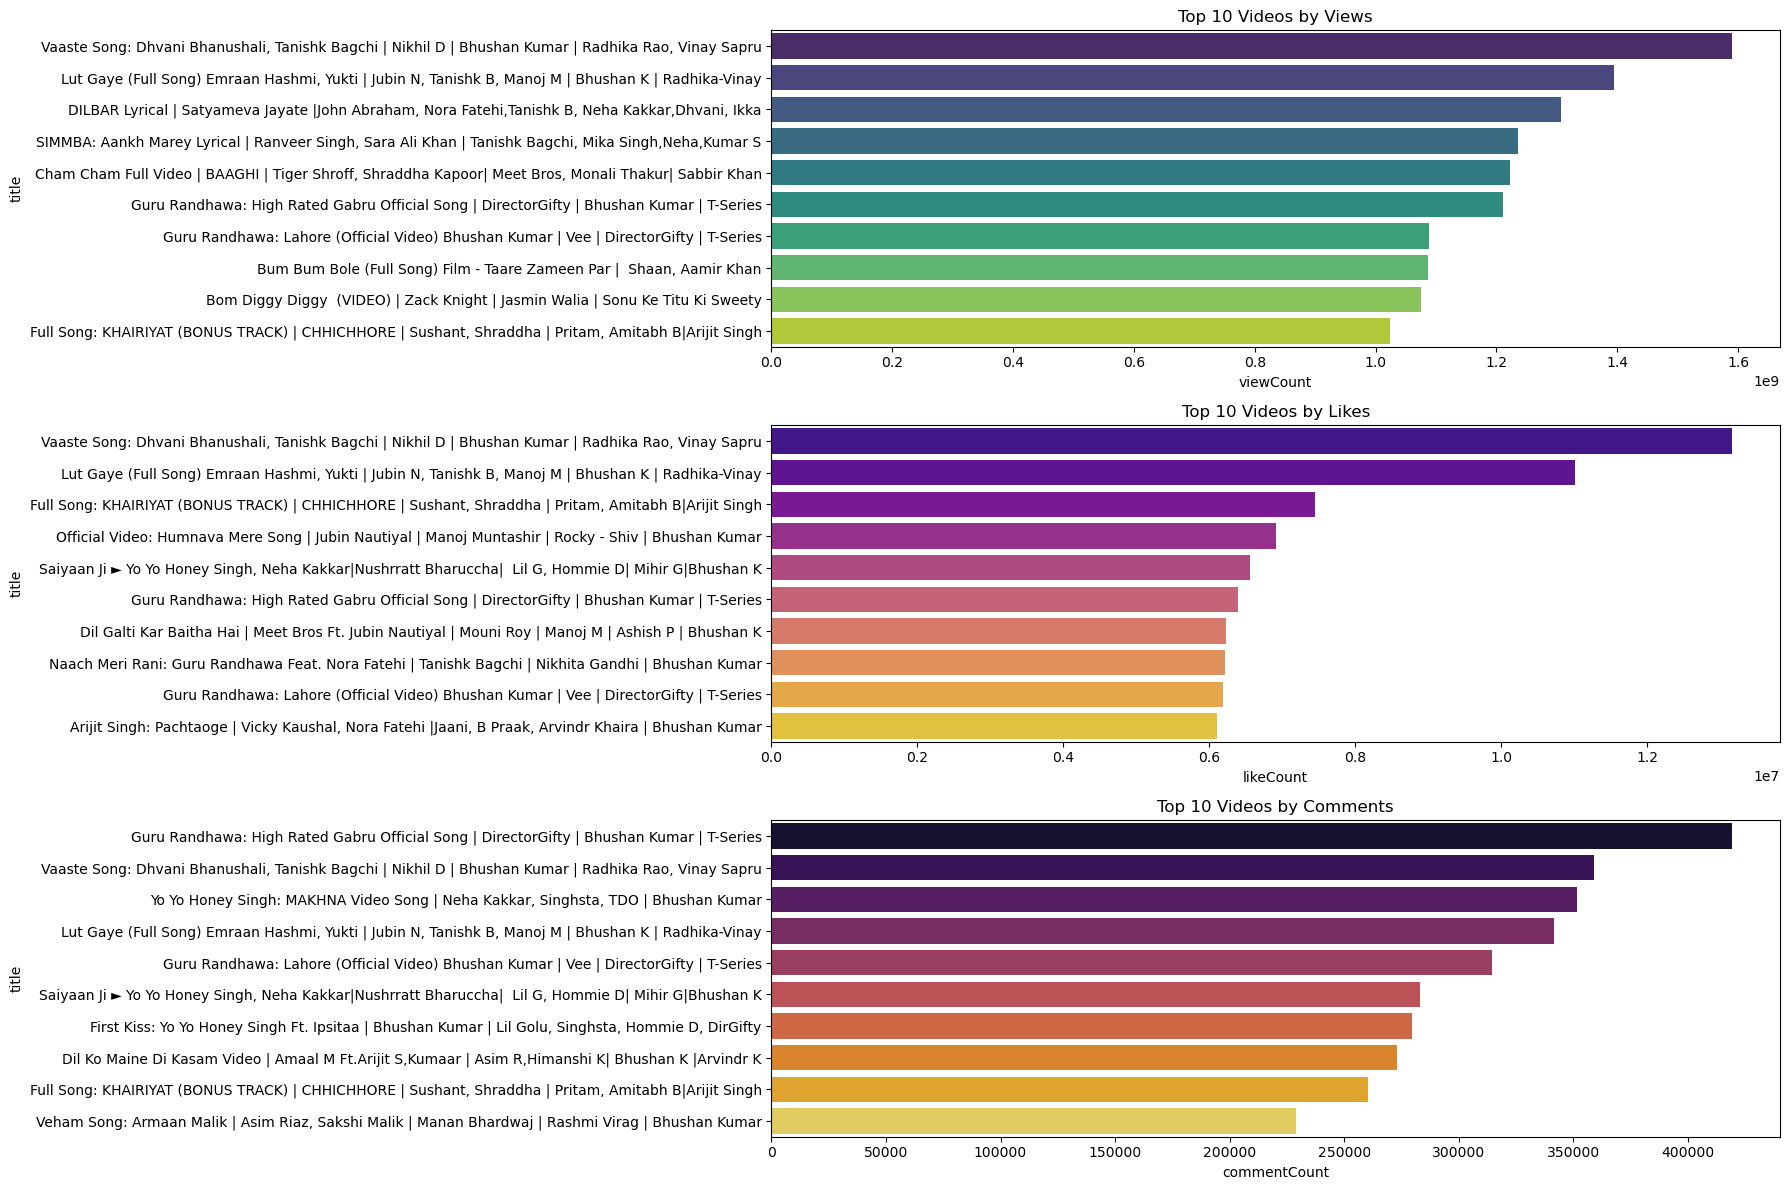

In [24]:
top_views = top_1000_details_df.nlargest(10, 'viewCount')
top_likes = top_1000_details_df.nlargest(10, 'likeCount')
top_comments = top_1000_details_df.nlargest(10, 'commentCount')

plt.figure(figsize=(18, 12))
plt.subplot(3, 1, 1)
sns.barplot(x='viewCount', y='title', data=top_views, palette='viridis')
plt.title('Top 10 Videos by Views')
plt.subplot(3, 1, 2)
sns.barplot(x='likeCount', y='title', data=top_likes, palette='plasma')
plt.title('Top 10 Videos by Likes')
plt.subplot(3, 1, 3)
sns.barplot(x='commentCount', y='title', data=top_comments, palette='inferno')
plt.title('Top 10 Videos by Comments')
plt.tight_layout()
plt.show()

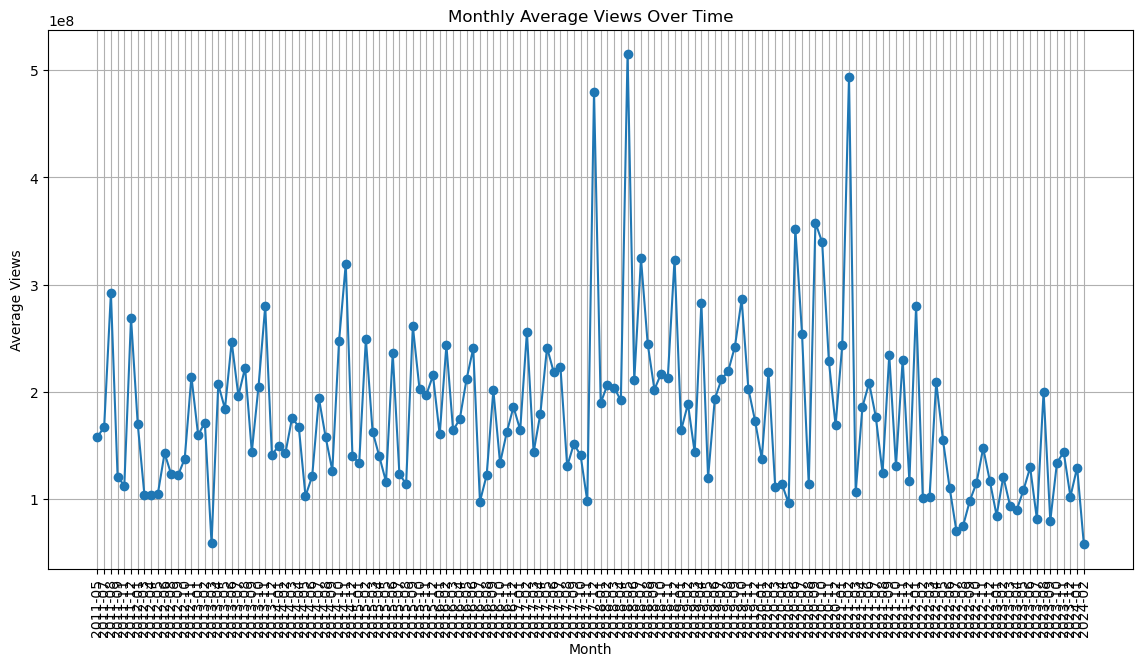

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'published_at' column is in datetime format
top_1000_details_df['published_at'] = pd.to_datetime(top_1000_details_df['published_at'])

# Remove timezone information if any
top_1000_details_df['published_at'] = top_1000_details_df['published_at'].dt.tz_localize(None)

# Create a new column 'year_month' representing the year and month
top_1000_details_df['year_month'] = top_1000_details_df['published_at'].dt.to_period('M')

# Calculate the mean viewCount for each month
monthly_views = top_1000_details_df.groupby('year_month')['viewCount'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(monthly_views['year_month'].astype(str), monthly_views['viewCount'], marker='o')
plt.xticks(rotation=90)
plt.title('Monthly Average Views Over Time')
plt.xlabel('Month')
plt.ylabel('Average Views')
plt.grid(True)
plt.show()